In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'E:/BtpNew/data/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 63 files belonging to 26 classes.
Using 51 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'E:/BtpNew/data/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 63 files belonging to 26 classes.
Using 12 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez']


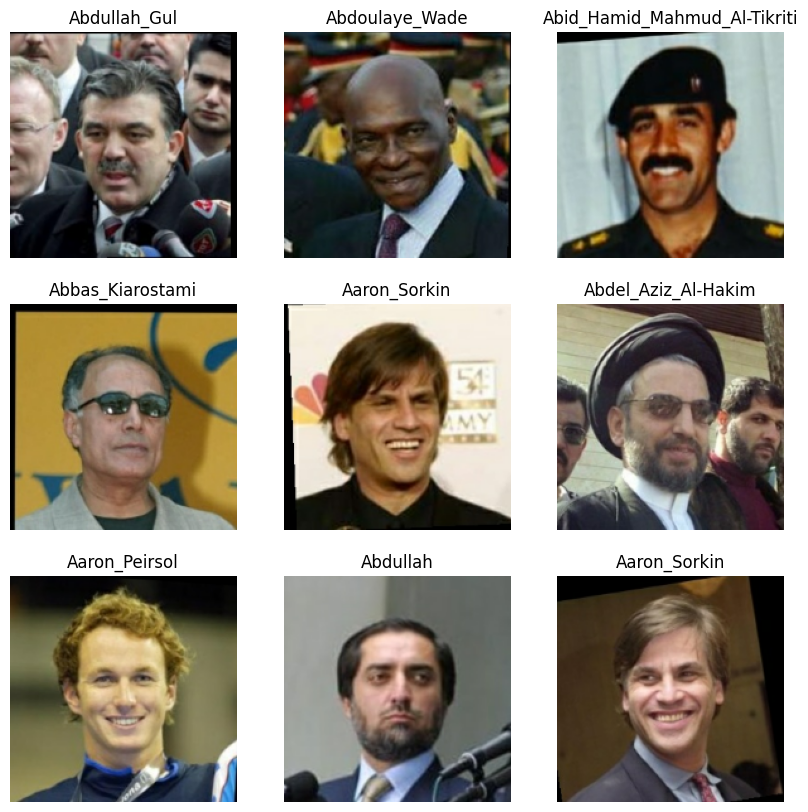

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
2/2 [==============================] - 3s 685ms/step - loss: 3.2065 - accuracy: 0.1765 - val_loss: 3.5049 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 1s 411ms/step - loss: 2.9527 - accuracy: 0.1569 - val_loss: 3.0698 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - 1s 731ms/step - loss: 2.5415 - accuracy: 0.2549 - val_loss: 2.5817 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 602ms/step - loss: 2.4172 - accuracy: 0.2549 - val_loss: 2.5791 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 679ms/step - loss: 1.8885 - accuracy: 0.4118 - val_loss: 2.6963 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 400ms/step - loss: 1.6940 - accuracy: 0.6275 - val_loss: 2.6745 - val_accuracy: 0.4167
Epoch 7/100
2/2 [==============================] - 1s 395ms/step - loss: 1.2679 - accuracy: 0.7255 - val_loss: 2.7983 - val_accuracy: 0.5000
Epoch 8/1

In [59]:
predict_img = 'E:/BtpNew/data/train/Abdoulaye_Wade/Abdoulaye_Wade_0004.jpg'

img = tf.keras.utils.load_img(
   predict_img , target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

score
# import numpy
# s = numpy.array([2, 3, 1, 4, 5])
sort_index = np.argsort(score)
print(sort_index,score)
sorted_indices = tf.argsort(score)
print(sorted_indices)

1/1 [==============================] - 0s 122ms/step
This image most likely belongs to Abdoulaye_Wade with a 95.89 percent confidence.
[25  7 19 14 17  4  2  8  0 16 24 15 23  6 22  3 13  9 18 21  1 10  5 20
 11 12] tf.Tensor(
[3.0818792e-05 2.6366296e-03 7.4733498e-06 5.9937511e-04 3.7851319e-06
 4.1952613e-03 3.0022208e-04 3.4239118e-08 2.6870943e-05 1.2025218e-03
 3.6736247e-03 1.8313710e-02 9.5889235e-01 8.5563411e-04 6.1548477e-08
 1.4636316e-04 6.4593019e-05 1.0841317e-06 1.6211575e-03 5.7498866e-08
 4.7516148e-03 2.0299091e-03 3.6046049e-04 2.1192126e-04 7.4403848e-05
 4.6652113e-11], shape=(26,), dtype=float32)
tf.Tensor(
[25  7 19 14 17  4  2  8  0 16 24 15 23  6 22  3 13  9 18 21  1 10  5 20
 11 12], shape=(26,), dtype=int32)


This image most likely belongs to Abdoulaye_Wade with a 95.89 percent confidence.


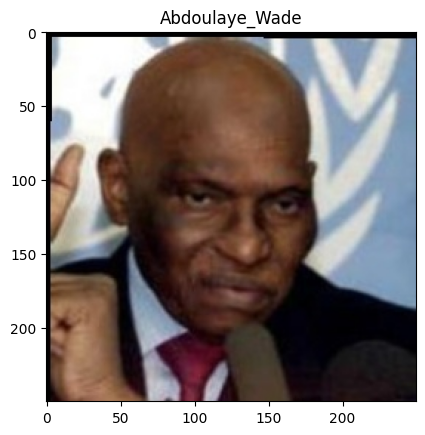

In [73]:
import matplotlib.image as mpimg

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(mpimg.imread(predict_img))
plt.title(class_names[sort_index[-1]])
plt.show()

In [63]:
for x in sort_index[-5:]:
    print(class_names[x])

Abdel_Madi_Shabneh
Aaron_Sorkin
Abdullah_al-Attiyah
Abdel_Nasser_Assidi
Abdoulaye_Wade


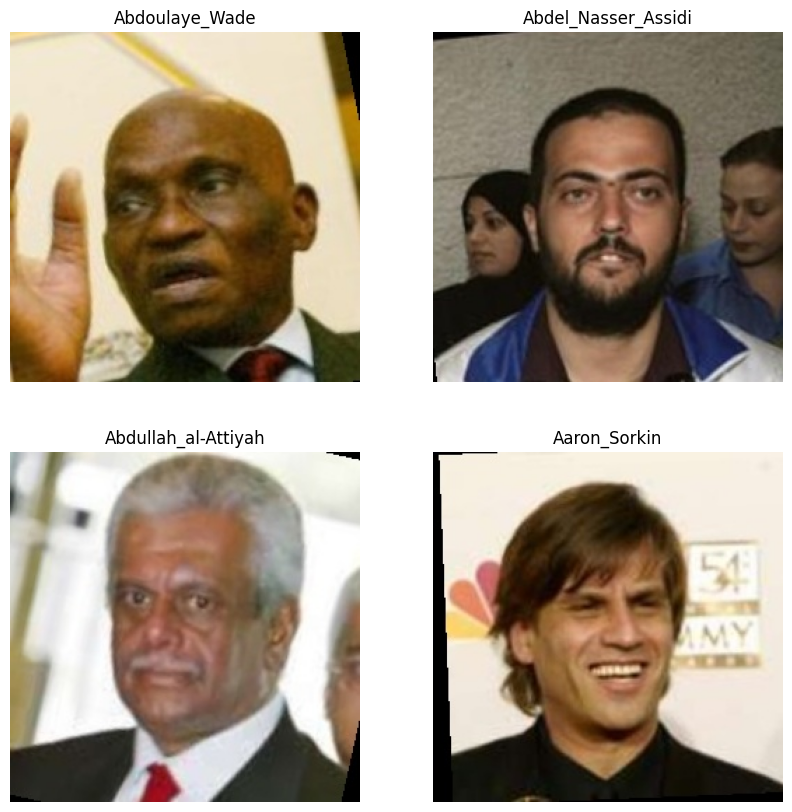

In [70]:
import os

plt.figure(figsize=(10, 10))

for i in range(1,5):
    ax = plt.subplot(2, 2,i)
    # plt.imshow(images[i].numpy().astype("uint8"))
    plt.imshow(mpimg.imread("E:/BtpNew/data/train/"+class_names[sort_index[-1*i]]+'/'+os.listdir("E:/BtpNew/data/train/"+class_names[sort_index[-1*i]])[0]))
    plt.title(class_names[sort_index[-1*i]])
    plt.axis("off")